# Load Data, Split and Display

In [80]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

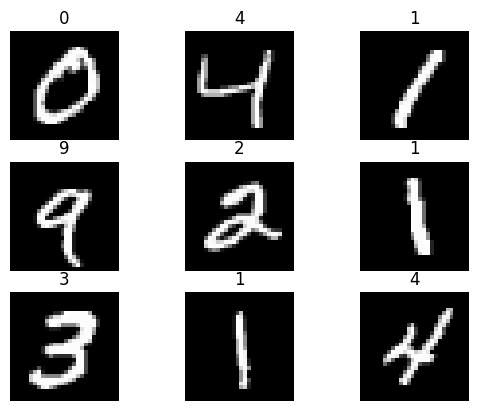

In [81]:
import matplotlib.pyplot as plt
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(X_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')

In [82]:
from sklearn.model_selection import train_test_split
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [83]:
X_train = X_train.astype('float32').reshape(X_train.shape[0],28,28,1)
X_test = X_test.astype('float32').reshape(X_test.shape[0],28,28,1)
X_val = X_val.astype('float32').reshape(X_val.shape[0],28,28,1)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

(60000, 28, 28, 1) (60000, 10)
(5000, 28, 28, 1) (5000, 10)
(5000, 28, 28, 1) (5000, 10)


# Combination 1 : No Aug Model, No Aug Test Data

In [84]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,Dropout

input = Input(shape=(28,28,1))
x = Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

model = Model(input,output)
aug_model = Model(input,output)

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0   

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss',patience=2)]

In [86]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=64,shuffle=True,callbacks=[callbacks])

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3631 - accuracy: 0.9290 - val_loss: 0.0660 - val_accuracy: 0.9774
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0633 - accuracy: 0.9802 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0664 - val_accuracy: 0.9818
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0587 - val_accuracy: 0.9828


In [87]:
print("Training Accuracy : ",model.evaluate(X_train,y_train))
print("Testing Accuracy : ",model.evaluate(X_test,y_test))
print("Validation Accuracy : ", model.evaluate(X_val,y_val))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0255 - accuracy: 0.9915
Training Accuracy :  [0.025468237698078156, 0.9915000200271606]
157/157 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9850
Testing Accuracy :  [0.05102158337831497, 0.9850000143051147]
157/157 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9828
Validation Accuracy :  [0.05867336317896843, 0.9828000068664551]


Data Generator

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    shear_range= 0.5,
    zoom_range=0.7,
    width_shift_range=0.25,
    height_shift_range=0.4,
    horizontal_flip=False,
    vertical_flip=False,
)

Show Augmented Images

In [89]:
train_data_generator = datagen.flow(X_train,y_train,batch_size=10)
test_data_generator = datagen.flow(X_test,y_test,batch_size=10)
val_data_generator = datagen.flow(X_val,y_val,batch_size=10)

In [90]:
X_train_augmented = []
X_test_augmented = []


y_train_augmented = []
y_test_augmented = []

In [91]:
import numpy as np

num_of_samples = 6000

# Generated for Training
for i in range(num_of_samples):
  images,labels = next(train_data_generator)
  X_train_augmented.append(images)
  y_train_augmented.append(labels)

X_train_augmented = np.concatenate(X_train_augmented)
y_train_augmented = np.concatenate(y_train_augmented)


print("Augmented Image Generator for Train : ",X_train_augmented.shape,y_train_augmented.shape)

Augmented Image Generator for Train :  (60000, 28, 28, 1) (60000, 10)


In [92]:
num_of_samples = 500

# Generated for Training
for i in range(num_of_samples):
  images,labels = next(test_data_generator)
  X_test_augmented.append(images)
  y_test_augmented.append(labels)

X_test_augmented = np.concatenate(X_test_augmented)
y_test_augmented = np.concatenate(y_test_augmented)


print("Augmented Image Generator for Test : ",X_test_augmented.shape,y_test_augmented.shape)

Augmented Image Generator for Test :  (5000, 28, 28, 1) (5000, 10)


# Display Augmented Data from Train Set

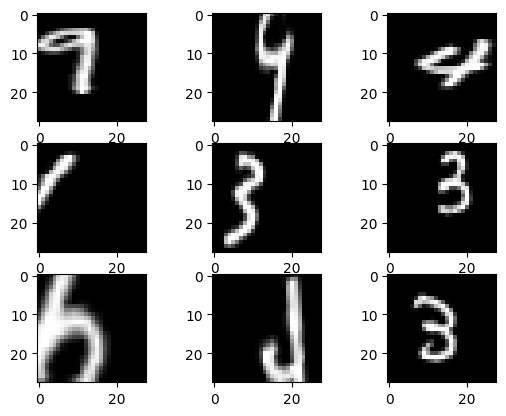

In [93]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train_augmented[i],cmap='grey')

# Merge Original 60,000 Train Images with 60,000 Augmented Image

In [94]:
X_train_augmented = np.concatenate((X_train,X_train_augmented))
y_train_augmented = np.concatenate((y_train,y_train_augmented))

# Merge Original 5,000 Test Images with 5000 Augmented Image

In [95]:
X_test_augmented = np.concatenate((X_test,X_test_augmented))
y_test_augmented = np.concatenate((y_test,y_test_augmented))

In [96]:
print("No Aug Model and No Aug Test Data : ",model.evaluate(X_test,y_test))
print("No Aug Model and Aug Test Data : ",model.evaluate(X_test_augmented,y_test_augmented))
model_1_score = model.evaluate(X_test,y_test)
model_2_score = model.evaluate(X_test_augmented,y_test_augmented)

157/157 [==============================] - 1s 4ms/step - loss: 0.0510 - accuracy: 0.9850
No Aug Model and No Aug Test Data :  [0.05102158337831497, 0.9850000143051147]
313/313 [==============================] - 1s 2ms/step - loss: 2.6184 - accuracy: 0.6132
No Aug Model and Aug Test Data :  [2.618440866470337, 0.6132000088691711]
313/313 [==============================] - 1s 2ms/step - loss: 2.6184 - accuracy: 0.6132


# Combination 2 : No Augmentation Model, But Augmented Test Data

In [97]:
aug_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
aug_history = aug_model.fit(X_train_augmented,y_train_augmented,validation_data=(X_val,y_val),epochs=100,callbacks=[callbacks],batch_size=64)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5316 - accuracy: 0.8247 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3205 - accuracy: 0.8944 - val_loss: 0.0459 - val_accuracy: 0.9850
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9126 - val_loss: 0.0525 - val_accuracy: 0.9856
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2255 - accuracy: 0.9246 - val_loss: 0.0467 - val_accuracy: 0.9868


In [98]:
print("AUG Test Accuracy with Non-Aug Test Data : ",aug_model.evaluate(X_test,y_test))
print("AUG Test Accuracy with Aug Test Data : ",aug_model.evaluate(X_test_augmented,y_test_augmented))

model_3_score = aug_model.evaluate(X_test,y_test)
model_4_score = aug_model.evaluate(X_test_augmented,y_test_augmented)

157/157 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9900
AUG Test Accuracy with Non-Aug Test Data :  [0.041589248925447464, 0.9900000095367432]
313/313 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8936
AUG Test Accuracy with Aug Test Data :  [0.3415338397026062, 0.8935999870300293]
313/313 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8936


# Comparison

In [99]:
categories = ["No Aug Model + No Aug Test Data", 
              "No Aug Model + Aug Test Data",
              "Aug Model + No Aug Test Data", 
              "Aug Model + Aug Test Data" 
              ]

values=[
    model_1_score,
    model_2_score,
    model_3_score,
    model_4_score
    ]

import pandas as pd
df = pd.DataFrame(values,index=categories,columns=['Loss','Accuracy'])
print(df)

                                     Loss  Accuracy
No Aug Model + No Aug Test Data  0.051022    0.9850
No Aug Model + Aug Test Data     2.618441    0.6132
Aug Model + No Aug Test Data     0.041589    0.9900
Aug Model + Aug Test Data        0.341534    0.8936
